<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una__10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [ ]:
import pandas as pd
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)

pd.set_option('display.max_columns', None)
print(df.head())
print(df.tail())
print(df.info())

   Unnamed: 0 first_name    last_name                      name  year  rank  \
0           0        Les  12 Poissons      Rondo pour trompette  2002   NaN   
1           1    Lejaren     a'Hiller  Sleep of Cyma Roget, The  1920   NaN   
2           2   Khairiya    A-Mansour          Churches in Iraq  1988   NaN   
3           3    Ricardo     A. Solla                  Foto, La  2001   NaN   
4           4    Ricardo     A. Solla                  Foto, La  2001   NaN   

         genre  
0        Short  
1        Drama  
2  Documentary  
3        Drama  
4        Short  
        Unnamed: 0 first_name last_name                                name  \
368889      368889      Yusuf      Ünal                      Kalbim agliyor   
368890      368890      Ahmet     Ündag                 Ve gnese kan siradi   
368891      368891       Idil      Üner  Liebenden vom Hotel von Osman, Die   
368892      368892     Yüksel     Ünsal                   Evvel zaman iinde   
368893      368893     Yükse

### Clean the dataset 
---


In [ ]:
# reasonable to drop all the rows with no rank?
# remove allthe special chars in the names??
# at least drop duplicates
df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None


In [ ]:
  filtered_rank_df = df[~df["rank"].isnull()] #need to assign a new df
  print(filtered_rank_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB
None


In [ ]:
#remove duplicate films (which have separate rows per genre)
#To remove rows that have duplicate entries in multiple columns
unique_movies_df = df.drop_duplicates(subset = ['name', 'last_name','first_name','year'])
unique_movies_df.drop('genre', axis=1, inplace=True)
print(unique_movies_df.head(100))
print(unique_movies_df.info())

     Unnamed: 0          first_name    last_name                      name  \
0             0                 Les  12 Poissons      Rondo pour trompette   
1             1             Lejaren     a'Hiller  Sleep of Cyma Roget, The   
2             2            Khairiya    A-Mansour          Churches in Iraq   
3             3             Ricardo     A. Solla                  Foto, La   
5             5  Kodanda Rami Reddy           A.        Abhilasha (1983/I)   
..          ...                 ...          ...                       ...   
171         171                Devi    Abashidze   Kvela kometa rodi qreba   
172         172                Devi    Abashidze           Stalinis shvili   
173         173                Dodo    Abashidze  Ambavi Suramis tsikhitsa   
174         174                Dodo    Abashidze             Ashugi Qaribi   
175         175               Leila    Abashidze  Tbilisi, Parizi, Tbilisi   

     year  rank  
0    2002   NaN  
1    1920   NaN  
2    1988

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### How many movies of each genre are there?
---

In [ ]:
def count_movies_by_genre(mydf):
  # #find a list of uniqe genres
  genres_list= mydf['genre'].unique()
  print(genres_list)
  print("\n\nGenre   #Movies")
  print("=======   =======")

  for mygenre in genres_list:
    genrecount = df[df['genre']==mygenre].count()
    print(mygenre,": ",genrecount[0])
    # print(type(genrecount))

count_movies_by_genre(df)

#Phoebe's
def count_genre_movies(df):
  genre_movies_df = df.groupby(['genre']).count()
  print(genre_movies_df)
count_genre_movies(df)

['Short' 'Drama' 'Documentary' 'Thriller' 'Romance' 'Action' 'Comedy'
 'Family' 'Crime' 'Adventure' 'Animation' 'Horror' 'Sci-Fi' 'War'
 'Musical' 'Western' 'Mystery' 'Fantasy' 'Music' 'Film-Noir']


Genre   #Movies
=======   =======
Short :  72894
Drama :  72635
Documentary :  35698
Thriller :  10681
Romance :  13562
Action :  12890
Comedy :  54667
Family :  11074
Crime :  12610
Adventure :  8598
Animation :  17038
Horror :  7423
Sci-Fi :  4957
War :  4398
Musical :  6843
Western :  8231
Mystery :  4951
Fantasy :  4871
Music :  4444
Film-Noir :  429
             Unnamed: 0  first_name  last_name   name   year   rank
genre                                                              
Action            12890       12890      12890  12890  12890   5873
Adventure          8598        8598       8598   8598   8598   3932
Animation         17038       17038      17038  17038  17038   4727
Comedy            54667       54667      54667  54667  54667  20633
Crime             12610       12610

### Which director has the highest ranked movies?
---

In [ ]:
# print (unique_movies_df.info()) #still has nulls for rank but has duplicate rows removed based on genre
sorted_by_rank_df = unique_movies_df.sort_values(by = ["rank"], ascending = False)
max_rank_only_df = sorted_by_rank_df[sorted_by_rank_df['rank']==9.9] # reduce to a smaller dataframe with only the values of rank = 9.9
#how to answer which director has the highest ranked movies? group by director name? Yes and also use count
best_directors_df = max_rank_only_df.groupby(['last_name']).count()  #use count to see which director has most movies with this ranking
sorted_best_directors_df = best_directors_df.sort_values(by = ["name"], ascending = False)
print(sorted_best_directors_df)
print("\n\nDirector with most movies of rank = 9.9 is ", sorted_best_directors_df.index[0], "with ",  sorted_best_directors_df.iloc[0][0], " movies")


              Unnamed: 0  first_name  name  year  rank
last_name                                             
Roussopoulos           3           3     3     3     3
Annensky               1           1     1     1     1
Hurtz                  1           1     1     1     1
Zebriünas              1           1     1     1     1
Wieder                 1           1     1     1     1
Trnka                  1           1     1     1     1
Tretbar                1           1     1     1     1
Tarrier                1           1     1     1     1
Salamon                1           1     1     1     1
Resnicoff              1           1     1     1     1
Pudovkin               1           1     1     1     1
Nicolaescu             1           1     1     1     1
Ng                     1           1     1     1     1
Jarmusch               1           1     1     1     1
Jankovics              1           1     1     1     1
Holmes                 1           1     1     1     1
Barkan    

### How many movies have ranks of over 9?
---


In [ ]:

# create a new filtered df based on rank > 9.0 used the filtered movie list otherwise have duplicates
max_ranks_df = unique_movies_df.loc[(unique_movies_df['rank'] > 9.0)] 
max_ranks_sorted_df = max_ranks_df.sort_values(by = ["rank"], ascending = False)
# print(max_ranks_sorted_df.head())
# print(max_ranks_sorted_df.tail())
# print(max_ranks_sorted_df.info())
print("# movies with ranks > 9.0 = ", len(max_ranks_sorted_df))


# movies with ranks > 9.0 =  913


### Plot a bar chart of mean rank and genre
---

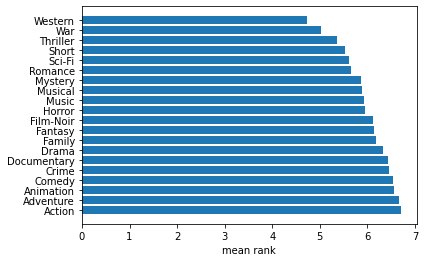

In [111]:
import numpy as np
import matplotlib.pyplot as plt

#first get df with genre and rank - use the one with the duplicate rows per genre and the null rows for rank removed
# print(filtered_rank_df.head())
# print(filtered_rank_df.info())
#want to group by genre and calcuate means
mean_rank_df = filtered_rank_df.groupby(filtered_rank_df['genre']).mean()
sorted_ranks_df = mean_rank_df.sort_values(by = ["rank"], ascending = False)

#create series for each
genres = np.array(mean_rank_df.index.values)
# print(genres)
mean_ranks = np.array(sorted_ranks_df['rank'])
# print(mean_ranks)
                  
labels = genres
plt.barh(labels,mean_ranks)
plt.xlabel("mean rank")
plt.show()          




### Plot a pie chart of how many movies of each genre there are 
---


### Plot a graph showing the mean Rank for each year 

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  
2.  
3.   

### Complete the tasks you have set out in the exercise above. 
---


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: